
# CIND 820: Big Data analytics project

Section: D1H

Student name: Pak Him Leung Ah Kang

Student Number: 500866890

Supervisor’s Name: Tamer Abdou




# Predicting Traffic Collisions using Machine Learning Techniques


The objective of this project is to predict traffic collisions based on various factors like red light violations, automated speed enforcement violations and intersection volume. After gaining further understanding of the data, we will use different machine learning algorithms to determine which factor best correlates with the number of traffic collisions.

**Datasets**

We are going to use four data sources in our analysis which can be found on Open Ottawa, the City of Ottawa’s Open Data Initiative website that provides free access to a wide range of municipal data such as transportation, recreational and environmental datasets.

All data sources have been chosen from the year 2019 except for one (automated speed camera violations) which is from the year 2020 which is the earliest year that the dataset has been collected. The year 2019 has been chosen because 2020 and the years after have witnessed a worldwide event which might have affected the data.

**Traffic collision by location (2019)**
https://open.ottawa.ca/maps/ed92e01509da45ccb70f9843b5f4ce91

**Transport Insertection Volume (2019)**
https://open.ottawa.ca/maps/f5d312a7606045d18baefecbac587a08

**Red light Violations (2019)**
https://open.ottawa.ca/maps/b053664e31a846078bea540c5224e34c

**Automated Speed Enforcement Camera Violations (2020)**
https://open.ottawa.ca/maps/b144a0f046ae4445841a96ad1d9def10

**Weather API**
https://openweathermap.org/api

# Data Analysis

In this first version of EDA, I will import the traffic collision and traffic volume datasets and merge them using longitude/latitude.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)


collision_df=pd.read_csv("Traffic_Collision.csv")
volume_df=pd.read_csv("Traffic_Volume.csv")

In [ ]:
collision_df.head()

,Location,Geo_ID,Total_Collisions,Cyclists_Collisions,Pedestrian_collisions,X,Y,Latitude,Longitude,ObjectId
0,HIGHWAY 417 btwn HIGHWAY 17 & HWY417 IC180 RAM...,__5SO7SU,1,0,0,317409.6914,5031061.481,45.419375,-76.338878,1
1,OTTAWA ROAD 29 btwn BIG HORN WAY & UPPER DWYER...,__5SO6A3,1,0,0,317822.4273,5030402.548,45.413438,-76.333622,2
2,MADAWASKA BLVD btwn CONNIFER LANE & Continuati...,__5SPK8W,1,0,0,318517.6140,5031843.404,45.426390,-76.324700,3
3,COUNTY RD 29 @ MADAWASKA BLVD (0011704),11704,1,0,0,318895.5442,5031715.602,45.425233,-76.319874,4
4,OTTAWA ROAD 29 btwn GALETTA SIDE RD & GALETTA ...,__3ZA2RW,1,0,0,319333.7352,5027523.424,45.387501,-76.314398,5


In [ ]:
volume_df.head()

,Intersection,All_Motorized_Vehicles_AADT_24Hour_Volume,Percent_Trucks,Pedestrians_Not_Factored,Bicycles_Not_Factored,Date_Collected,X,Y,LAT,LONG,FID,LAT_round,LONG_round
0,LAFONTAINE AVE @ MCARTHUR AVE,15299,0.0294,1083,48,1552968000000,370949.7123,5.032772e+06,45.431748,-75.654578,1,45.432,-75.655
1,LAPERRIERE AVE @ LARKIN ST,8972,0.0477,141,14,1551243600000,364233.7000,5.026780e+06,45.378436,-75.741125,2,45.378,-75.741
2,LARMOURS RD @ SARSFIELD RD,346,0.1280,1,0,1574226000000,395471.8493,5.033501e+06,45.435557,-75.341096,3,45.436,-75.341
3,LARRY ROBINSON RD @ MARVELVILLE RD,1466,0.1056,0,2,1574053200000,392846.8301,5.008668e+06,45.212478,-75.379055,4,45.212,-75.379
4,LASER ST @ GURDWARA RD,4379,0.0416,28,0,1575349200000,367233.7044,5.022163e+06,45.336641,-75.703407,5,45.337,-75.703


In [ ]:
# Merge the two datasets

# Rounding coordinates to 3 decimal places for approximate matching
collision_df['Latitude_round'] = collision_df['Latitude'].round(3)
collision_df['Longitude_round'] = collision_df['Longitude'].round(3)

volume_df['LAT_round'] = volume_df['LAT'].round(3)
volume_df['LONG_round'] = volume_df['LONG'].round(3)

# Merging based on the rounded coordinates
df = pd.merge(collision_df, volume_df,
                     left_on=['Latitude_round', 'Longitude_round'],
                     right_on=['LAT_round', 'LONG_round'],
                     how='inner')

# Display the first few rows of the merged dataset
df.head()

,Location,Geo_ID,Total_Collisions,Cyclists_Collisions,Pedestrian_collisions,X_x,Y_x,Latitude,Longitude,ObjectId,Latitude_round,Longitude_round,Intersection,All_Motorized_Vehicles_AADT_24Hour_Volume,Percent_Trucks,Pedestrians_Not_Factored,Bicycles_Not_Factored,Date_Collected,X_y,Y_y,LAT,LONG,FID,LAT_round,LONG_round
0,FITZROY ST btwn TO BE DETERMINED & CANON SMITH...,__3ZA4RO,1,0,0,327910.3649,5037648.911,45.478383,-76.204396,29,45.478,-76.204,CANON SMITH DR @ FITZROY ST,597,0.0412,5,0,1554264000000,327967.5981,5.037646e+06,45.478353,-76.203664,845,45.478,-76.204
1,UPPER DWYER HILL RD @ VAUGHAN SIDE RD (0002370),2370,1,0,0,331999.4342,5016530.526,45.288203,-76.153257,45,45.288,-76.153,UPPER DWYER HILL RD @ VAUGHAN SIDE RD,1068,0.0767,1,0,1554782400000,331999.4342,5.016531e+06,45.288203,-76.153257,402,45.288,-76.153
2,ALLBIRCH RD @ CONSTANCE BAY RD (0006015),6015,1,0,0,337866.0759,5038297.027,45.483815,-76.077012,91,45.484,-76.077,ALLBIRCH RD @ CONSTANCE BAY RD,3595,0.0497,8,0,1573621200000,337866.0759,5.038297e+06,45.483815,-76.077012,491,45.484,-76.077
3,DUNROBIN RD @ KINBURN SIDE RD (0001688),1688,1,0,0,338029.5988,5035929.629,45.462505,-76.075080,94,45.463,-76.075,DUNROBIN RD @ KINBURN SIDE RD,5636,0.0454,1,2,1554350400000,338029.5988,5.035930e+06,45.462505,-76.075080,187,45.463,-76.075
4,DIAMONDVIEW RD @ DONALD B. MUNRO DR (0011597),11597,1,0,0,338123.5141,5022171.510,45.338700,-76.074809,97,45.339,-76.075,DIAMONDVIEW RD @ DONALD B. MUNRO DR,2125,0.0578,0,0,1554782400000,338123.5141,5.022172e+06,45.338700,-76.074809,161,45.339,-76.075


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location                                   654 non-null    object 
 1   Geo_ID                                     654 non-null    object 
 2   Total_Collisions                           654 non-null    int64  
 3   Cyclists_Collisions                        654 non-null    int64  
 4   Pedestrian_collisions                      654 non-null    int64  
 5   X_x                                        654 non-null    float64
 6   Y_x                                        654 non-null    float64
 7   Latitude                                   654 non-null    float64
 8   Longitude                                  654 non-null    float64
 9   ObjectId                                   654 non-null    int64  
 10  Latitude_round            

In [ ]:
# Clean the data and Drop some duplicate columns

df = df.drop(columns=['X_x', 'Y_x','Latitude','Longitude','X_y','Y_y','LAT','LONG','LAT_round','LONG_round'])
df = df.drop(columns=['ObjectId', 'FID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location                                   654 non-null    object 
 1   Geo_ID                                     654 non-null    object 
 2   Total_Collisions                           654 non-null    int64  
 3   Cyclists_Collisions                        654 non-null    int64  
 4   Pedestrian_collisions                      654 non-null    int64  
 5   Latitude_round                             654 non-null    float64
 6   Longitude_round                            654 non-null    float64
 7   Intersection                               654 non-null    object 
 8   All_Motorized_Vehicles_AADT_24Hour_Volume  654 non-null    int64  
 9   Percent_Trucks                             654 non-null    float64
 10  Pedestrians_Not_Factored  

The above table shows the merged datasets. I will merge the other dataset when I have time

In [ ]:
df.describe()

,Total_Collisions,Cyclists_Collisions,Pedestrian_collisions,Latitude_round,Longitude_round,All_Motorized_Vehicles_AADT_24Hour_Volume,Percent_Trucks,Pedestrians_Not_Factored,Bicycles_Not_Factored,Date_Collected
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,6.540000e+02
mean,4.044343,0.068807,0.113150,45.379200,-75.685138,19274.307339,0.044660,1369.692661,102.555046,1.561221e+12
std,5.889190,0.276446,0.405979,0.070515,0.113187,13438.505313,0.032031,3213.267595,262.396657,1.062002e+10
min,1.000000,0.000000,0.000000,45.063000,-76.204000,419.000000,0.002500,0.000000,0.000000,1.546924e+12
25%,1.000000,0.000000,0.000000,45.350000,-75.725000,9563.000000,0.026900,39.000000,2.250000,1.551244e+12
50%,2.000000,0.000000,0.000000,45.400000,-75.691000,16771.000000,0.037050,204.000000,21.000000,1.559621e+12
75%,5.000000,0.000000,0.000000,45.421000,-75.636000,26595.000000,0.051575,919.000000,88.000000,1.572322e+12
max,58.000000,3.000000,4.000000,45.525000,-75.285000,77595.000000,0.240100,25500.000000,2837.000000,1.576732e+12


In [ ]:
df.to_csv("out.csv")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


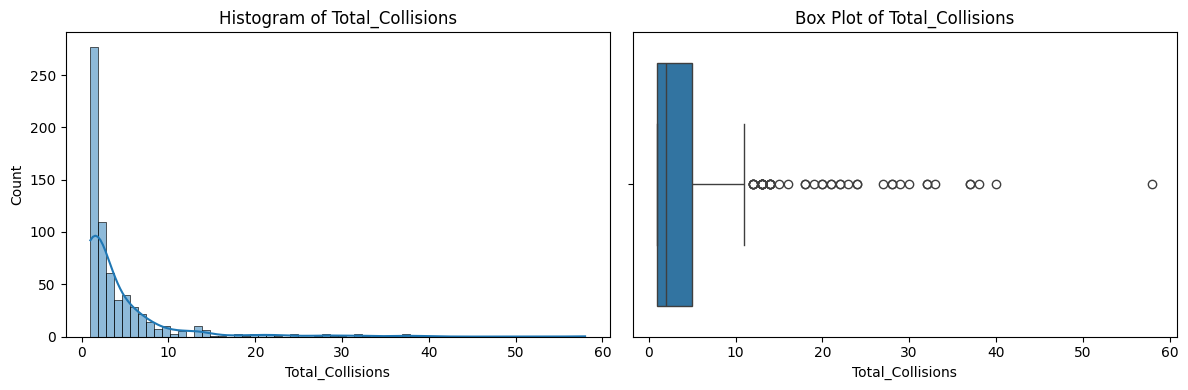


Descriptive Statistics for Total_Collisions:
count    654.000000
mean       4.044343
std        5.889190
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       58.000000
Name: Total_Collisions, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


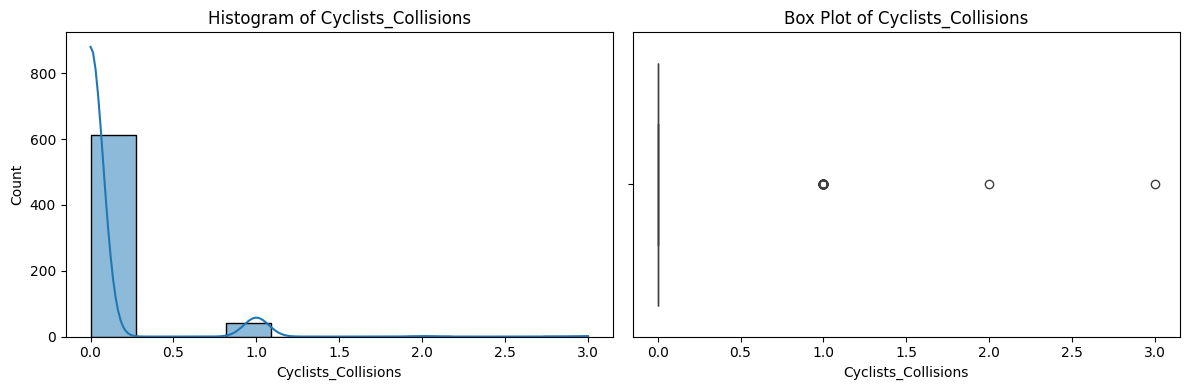


Descriptive Statistics for Cyclists_Collisions:
count    654.000000
mean       0.068807
std        0.276446
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: Cyclists_Collisions, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


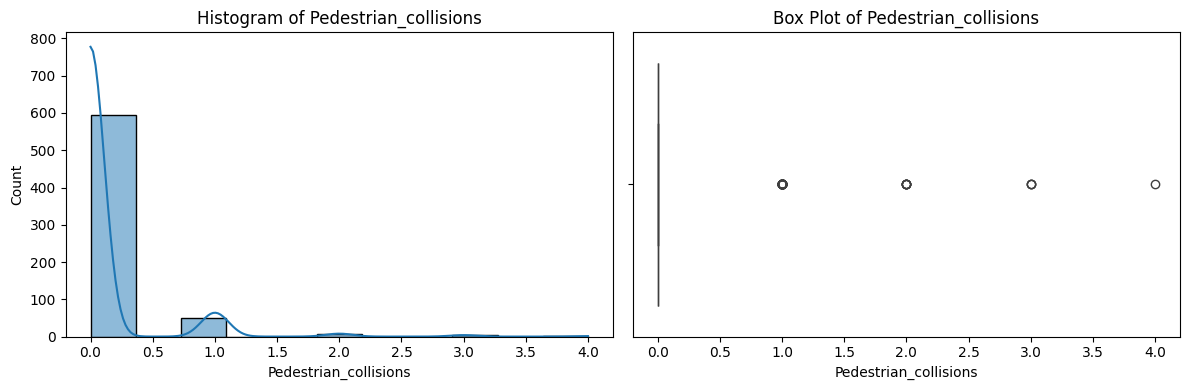


Descriptive Statistics for Pedestrian_collisions:
count    654.000000
mean       0.113150
std        0.405979
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: Pedestrian_collisions, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


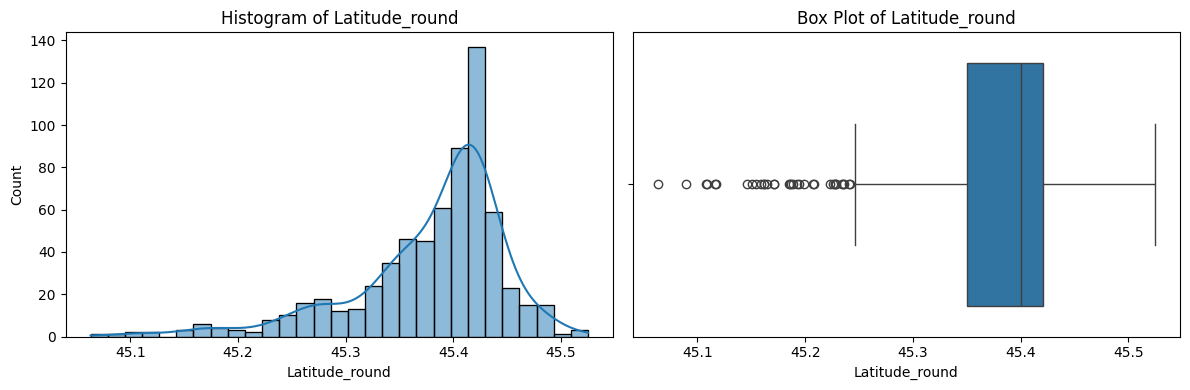


Descriptive Statistics for Latitude_round:
count    654.000000
mean      45.379200
std        0.070515
min       45.063000
25%       45.350000
50%       45.400000
75%       45.421000
max       45.525000
Name: Latitude_round, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


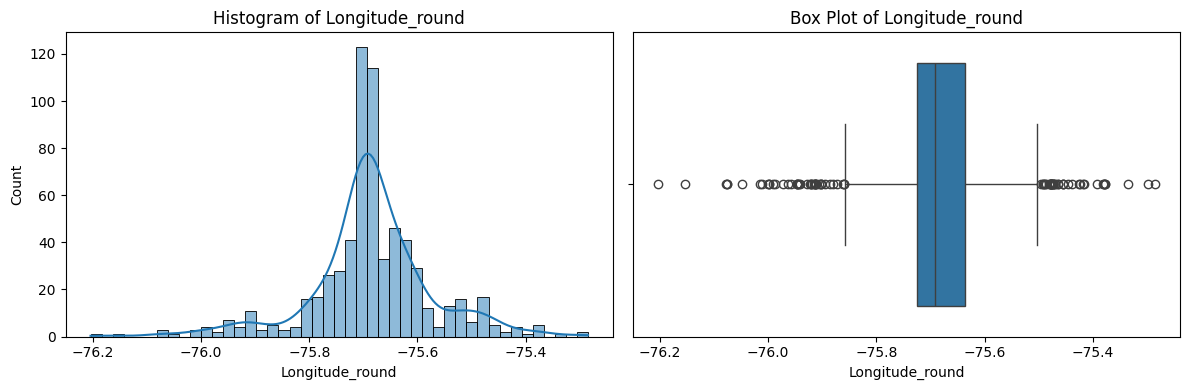


Descriptive Statistics for Longitude_round:
count    654.000000
mean     -75.685138
std        0.113187
min      -76.204000
25%      -75.725000
50%      -75.691000
75%      -75.636000
max      -75.285000
Name: Longitude_round, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


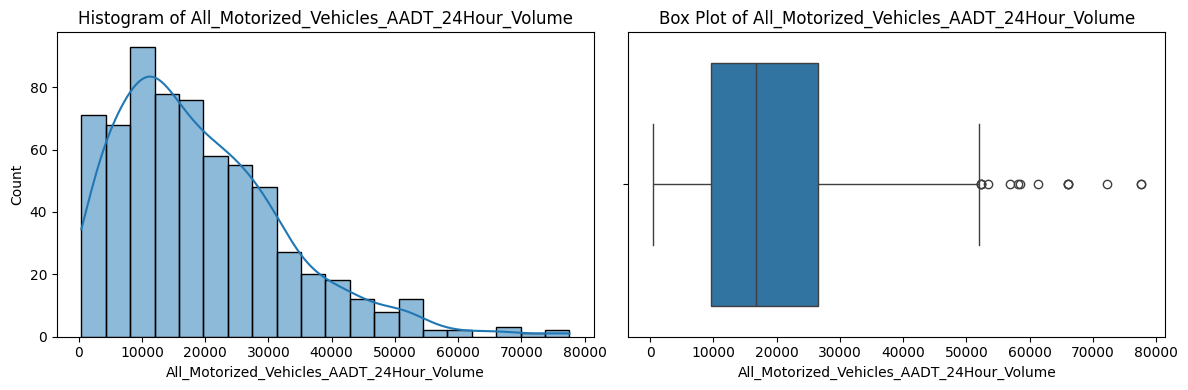


Descriptive Statistics for All_Motorized_Vehicles_AADT_24Hour_Volume:
count      654.000000
mean     19274.307339
std      13438.505313
min        419.000000
25%       9563.000000
50%      16771.000000
75%      26595.000000
max      77595.000000
Name: All_Motorized_Vehicles_AADT_24Hour_Volume, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


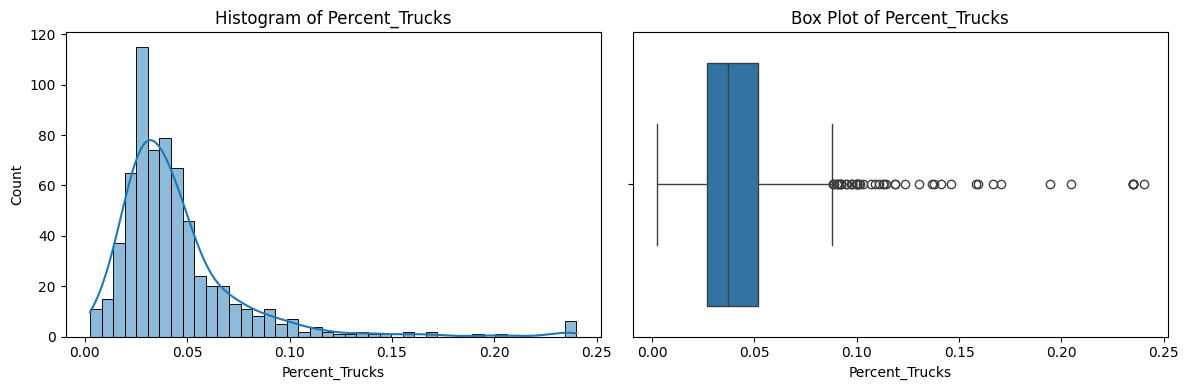


Descriptive Statistics for Percent_Trucks:
count    654.000000
mean       0.044660
std        0.032031
min        0.002500
25%        0.026900
50%        0.037050
75%        0.051575
max        0.240100
Name: Percent_Trucks, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


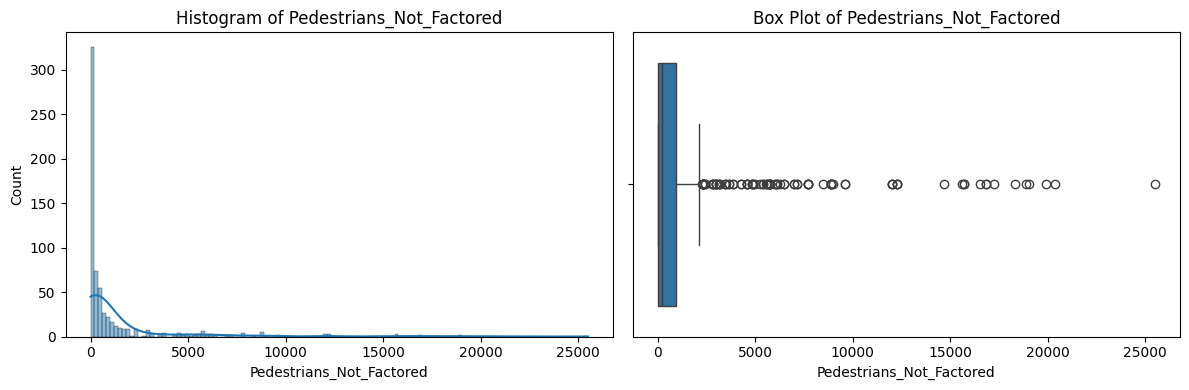


Descriptive Statistics for Pedestrians_Not_Factored:
count      654.000000
mean      1369.692661
std       3213.267595
min          0.000000
25%         39.000000
50%        204.000000
75%        919.000000
max      25500.000000
Name: Pedestrians_Not_Factored, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


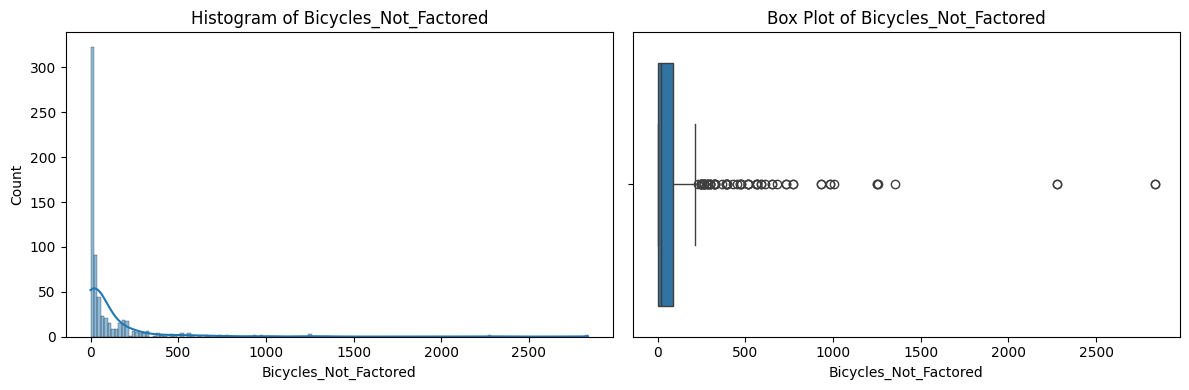


Descriptive Statistics for Bicycles_Not_Factored:
count     654.000000
mean      102.555046
std       262.396657
min         0.000000
25%         2.250000
50%        21.000000
75%        88.000000
max      2837.000000
Name: Bicycles_Not_Factored, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


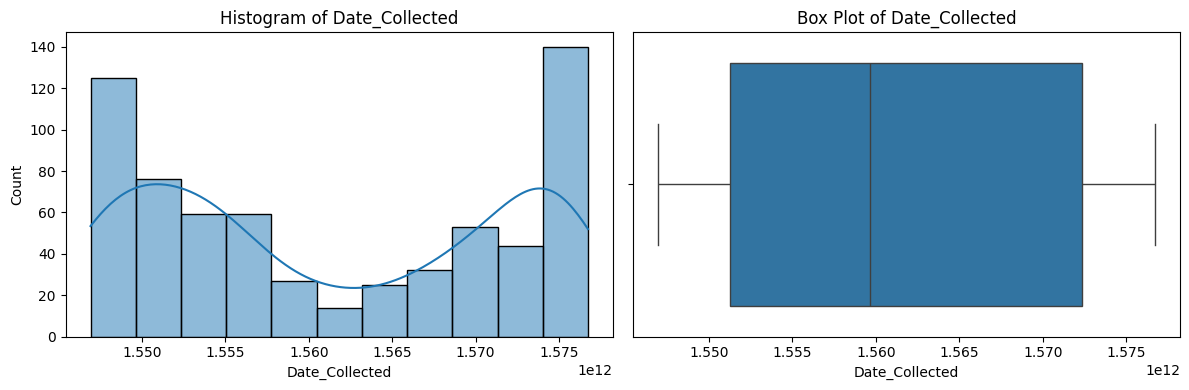


Descriptive Statistics for Date_Collected:
count    6.540000e+02
mean     1.561221e+12
std      1.062002e+10
min      1.546924e+12
25%      1.551244e+12
50%      1.559621e+12
75%      1.572322e+12
max      1.576732e+12
Name: Date_Collected, dtype: float64


In [ ]:
# Univariate Analysis


# Select numeric columns for analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

def univariate_analysis(df, column):
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

    # Descriptive statistics
    print(f"\nDescriptive Statistics for {column}:")
    print(df[column].describe())

# Perform univariate analysis for each numeric column
for column in numeric_columns:
    univariate_analysis(df, column)

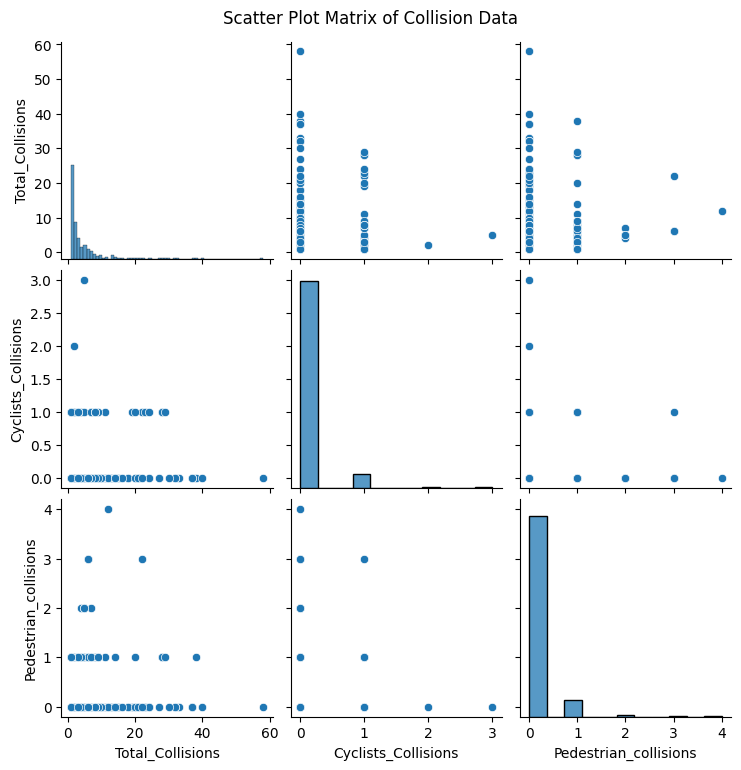

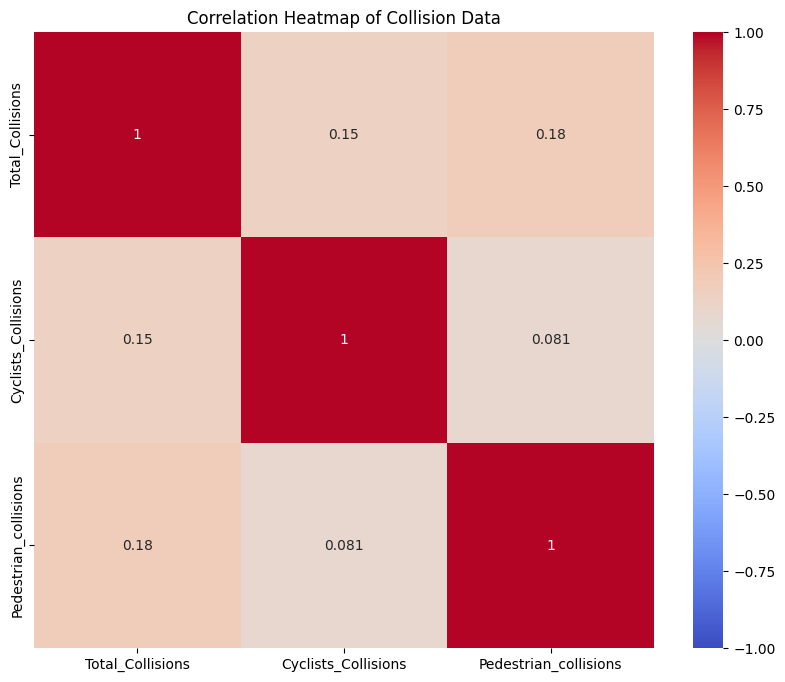

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


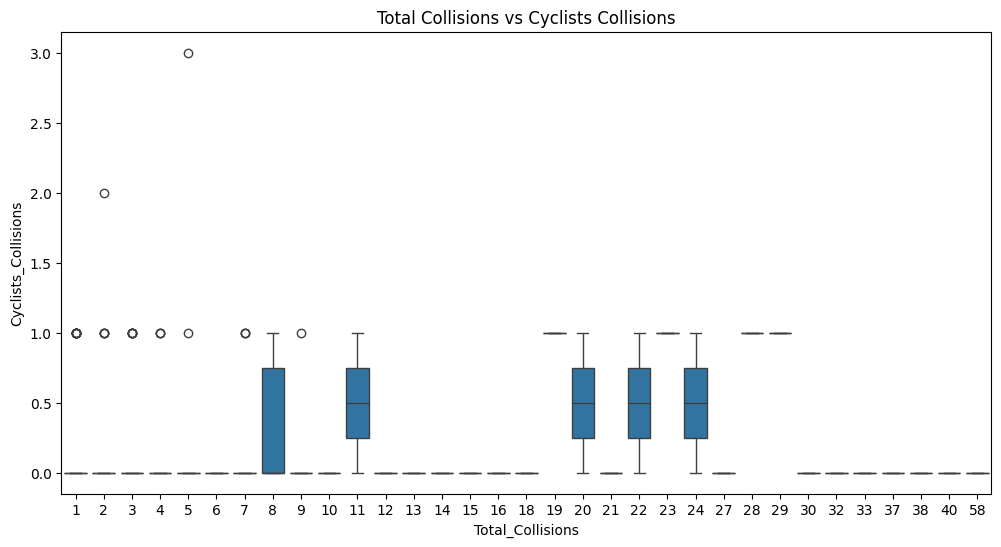

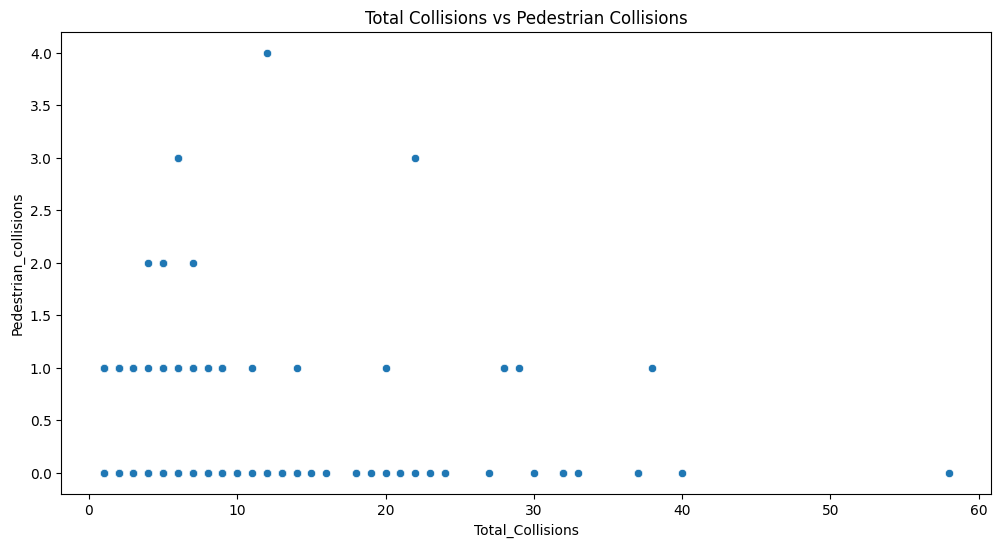

In [ ]:
# Bivariate Analysis

collision_columns = ['Total_Collisions', 'Cyclists_Collisions', 'Pedestrian_collisions']

# Scatter plot matrix
sns.pairplot(df[collision_columns])
plt.suptitle("Scatter Plot Matrix of Collision Data", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[collision_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Collision Data")
plt.show()

# Boxplot of Total_Collisions vs Cyclists_Collisions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_Collisions', y='Cyclists_Collisions', data=df)
plt.title('Total Collisions vs Cyclists Collisions')
plt.show()

# Scatter plot of Total_Collisions vs Pedestrian_collisions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Collisions', y='Pedestrian_collisions', data=df)
plt.title('Total Collisions vs Pedestrian Collisions')
plt.show()

# Dataset Summary

There are around 600+ rows in my merged dataset for the two datasets that were merged together through the longitude and latitude columns. They can also be merged more accurately through the X, Y columns but I did not have time to investigate during this premilinary analysis.

Adding more datasets from the red light and traffic cameras will increase the dataset

# Research Questions

**Is there a relationship between the traffic collision and traffic volume?**

This is a classificiation problem because we are predicting whether there will be a collision or not. Therefore, we can use logistic regression or random forest classifier. We can build a tool to show a map of the collision hotspots and the traffic volume.

The city and police will benefit from this data.


**Is there a correlation between speed/red light violations and collisions and can we predict at risk locations for future collisions?**

I will use a GIS technique to map out violations and collision hotspots and maybe the tool might be able to predict the probability of collisions at these hotspots.

The city road designers and police can benefit from this data.

**Is there correlation between weather and traffic collision?**

Chi-square test and pearson correlation will be used to assess the correlation between these two variables.


# Concerns

The data might not be accurate because the longitude/latitute columns might not fully correspond when I merged the traffic collision and traffic volume dataset. I had to remove decimal places from the longitude and latitute when combining the datasets, thus reducing accuracy.



